<a href="https://colab.research.google.com/github/drak247/MPA-MLF_230070_Havrda/blob/main/mpa_mlf_svm_230070.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

student: 230070

# SVM for classification

Load IRIS dataset, check its contents:


In [ ]:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[0:5])
print(iris.target)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Split data into training and testing parts:

In [ ]:
from sklearn.model_selection import train_test_split
X=iris.data
y=iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


Use a Support Vector Machine for classification:


In [ ]:
from sklearn.svm import SVC
SVMmodel=SVC(kernel='linear')
SVMmodel.fit(X_train,y_train)
SVMmodel.get_params()
SVMmodel.score(X_test,y_test)

0.9333333333333333

Let's explore more now.

*   Choose only first two features (columns) of iris.data
*   SVM is in its basic form a 2-class classifier, so eliminate iris.target =2 from the data



In [ ]:
X_2features = iris.data[:, :2]
y_2classes = iris.target[iris.target != 2]
X_2features_0class = X_2features[iris.target == 0]
X_2features_1class = X_2features[iris.target == 1]

X_2features_2classes=X_2features[y_2classes != 2]

print(X_2features_2classes.shape)
print(X_2features_0class[0:5])
print(X_2features_1class[0:5])

(100, 2)
[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]]
[[7.  3.2]
 [6.4 3.2]
 [6.9 3.1]
 [5.5 2.3]
 [6.5 2.8]]


Plot scatterplots of targets 0 and 1 and check the separability of the classes:

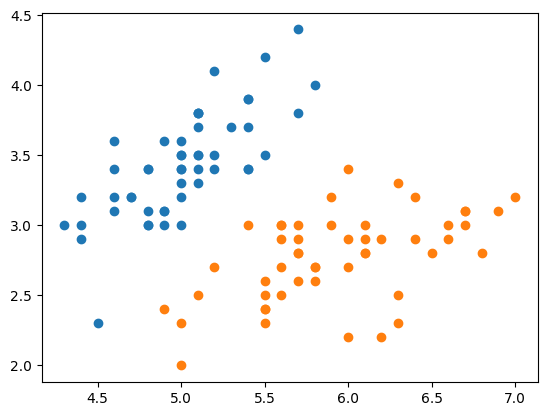

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X_2features_0class[:,0], X_2features_0class[:,1])
plt.scatter(X_2features_1class[:,0], X_2features_1class[:,1])


Train and test the SVM classifier, play with regularization parameter C (either use the default value or try e.g. 200)

In [ ]:
X=X_2features_2classes
y=y_2classes
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)


SVMmodel=SVC(kernel='linear',C=300)
SVMmodel.fit(X_train,y_train)
SVMmodel.get_params()
SVMmodel.score(X_test,y_test)

(80, 2)
(20, 2)


1.0

Show support vectors in the 2D plot, plot the decision line from equation [w0 w1]*[x0 x1] + b = 0:

[[ 6.28418412 -5.14204349]]
[-17.45178704]


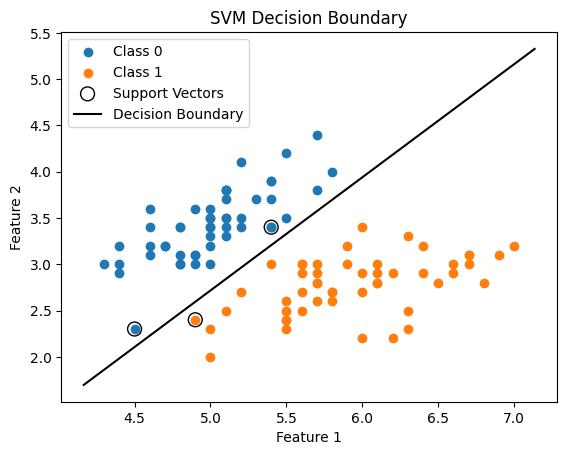

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(X_2features_0class[:,0], X_2features_0class[:,1], label='Class 0')
plt.scatter(X_2features_1class[:,0], X_2features_1class[:,1], label='Class 1')

supvectors=SVMmodel.support_vectors_
# Plot the support vectors here
plt.scatter(supvectors[:,0], supvectors[:,1], s=100, facecolors='none', edgecolors='k', label='Support Vectors')

#Separating line coefficients:
W=SVMmodel.coef_
b=SVMmodel.intercept_
print(W)
print(b)
# Plot the decision boundary
# boundary w_0*x_0 + w_1*x_1 + b = 0
# => x_1 = (-w_0*x_0 - b) / w_1

# Create a range of x values
ax = plt.gca()
x_min, x_max = ax.get_xlim()
xx = np.linspace(x_min, x_max, 100)

# y values for decision line
yy = (-W[0,0] * xx - b[0]) / W[0,1]

plt.plot(xx, yy, 'k-', label='Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary')
plt.legend()
plt.show()

# Anomaly detection via SVM

Import one-class SVM and generate data (Gaussian blobs in 2D-plane):

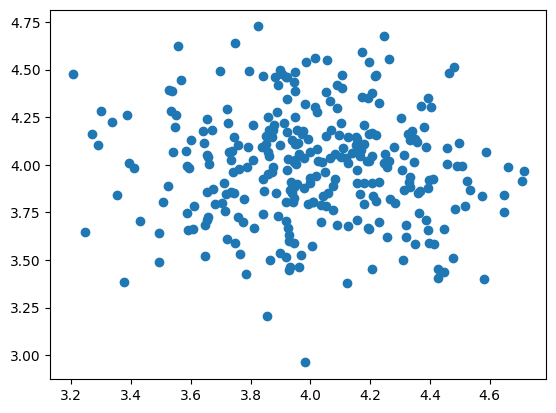

In [ ]:
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random

random.seed(11)
x, _ = make_blobs(n_samples=300, centers=1, cluster_std=.3, center_box=(4, 4))

plt.scatter(x[:,0], x[:,1])
plt.show()



Train one-class SVM and plot the outliers (outputs of prediction being equal to -1)

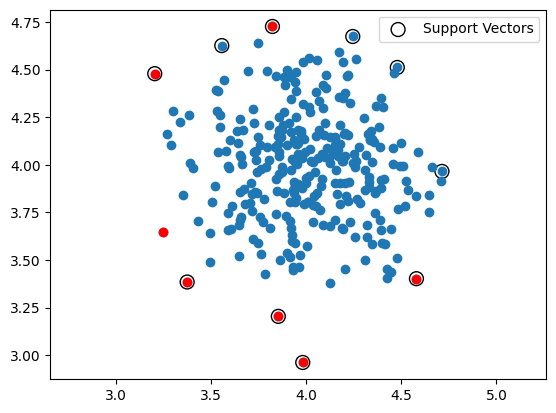

In [ ]:
SVMmodelOne = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)


SVMmodelOne.fit(x)
pred = SVMmodelOne.predict(x)
anom_index = where(pred==-1)
values = x[anom_index]
supvectors=SVMmodelOne.support_vectors_
plt.scatter(supvectors[:,0], supvectors[:,1], s=100, facecolors='none', edgecolors='k',label='Support Vectors')
plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.legend()
plt.axis('equal')
plt.show()



Plot the support vectors:

In [ ]:
#supvectors=SVMmodelOne.support_vectors_
#plt.scatter(supvectors[:,0], supvectors[:,1], s=100, facecolors='none', edgecolors='k',)

What if we want to have a control what is outlier? Use e.g. 5% "quantile" to mark the outliers. Every point with lower score than threshold will be an outlier.

8.989098620408397


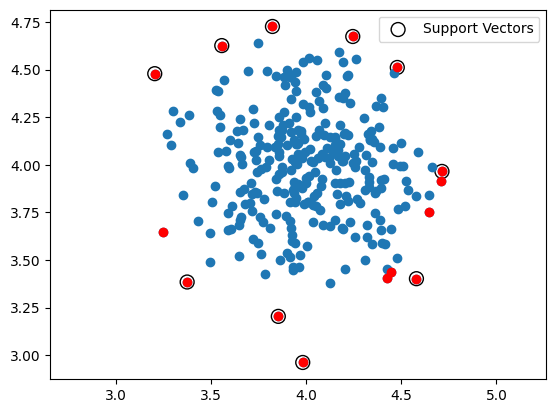

In [ ]:
scores = SVMmodelOne.score_samples(x)

thresh = quantile(scores, 0.05)
print(thresh)
index = where(scores<=thresh)
values = x[index]

supvectors=SVMmodelOne.support_vectors_
plt.scatter(supvectors[:,0], supvectors[:,1], s=100, facecolors='none', edgecolors='k',label='Support Vectors')
plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.legend()
plt.axis('equal')
plt.show()